In [27]:
#important library we need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- #load all of data :

In [28]:
twitts_train = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")
twitts_valid = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv")


- At first put name for each column:
- At the second step add two data frame to the one dataframe to analysis

In [29]:
column_name=['tweetID','entity','sentiment','tweet_content']
twitts_train.columns=column_name
twitts_valid.columns=column_name
twitts=pd.concat([twitts_train,twitts_valid],ignore_index=False)
twitts.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


- show the names of the columns in our dataframe:

In [30]:
twitts.columns.tolist()

['tweetID', 'entity', 'sentiment', 'tweet_content']

- the info for eac column
- info content:(name of column,nonnull values in the data,type of the column)

In [31]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>

Index: 75680 entries, 0 to 998

Data columns (total 4 columns):

 #   Column         Non-Null Count  Dtype 

---  ------         --------------  ----- 

 0   tweetID        75680 non-null  int64 

 1   entity         75680 non-null  object

 2   sentiment      75680 non-null  object

 3   tweet_content  74994 non-null  object

dtypes: int64(1), object(3)

memory usage: 2.9+ MB


# Cleaning DAtA

- check the null values of the data:

In [32]:
twitts.isnull().sum()

tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64

- check the duplicated values in the data:

In [33]:
twitts.duplicated().sum()

3216

- Remove the all null values and duplicated values:
- Then check for the cleaning:

In [34]:
twitts.dropna(inplace=True)
twitts.drop_duplicates(inplace=True)
print("null values:","\n",twitts.isnull().sum())
print("duplicated values:",twitts.duplicated().sum())

null values: 

 tweetID          0

entity           0

sentiment        0

tweet_content    0

dtype: int64

duplicated values: 0


# Drop the unneeded columns:

In [35]:
#unneeded columns:
twitts.drop(columns=['tweetID','tweet_content'],inplace=True)
twitts.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [36]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>

Index: 72138 entries, 0 to 995

Data columns (total 2 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   entity     72138 non-null  object

 1   sentiment  72138 non-null  object

dtypes: object(2)

memory usage: 1.7+ MB


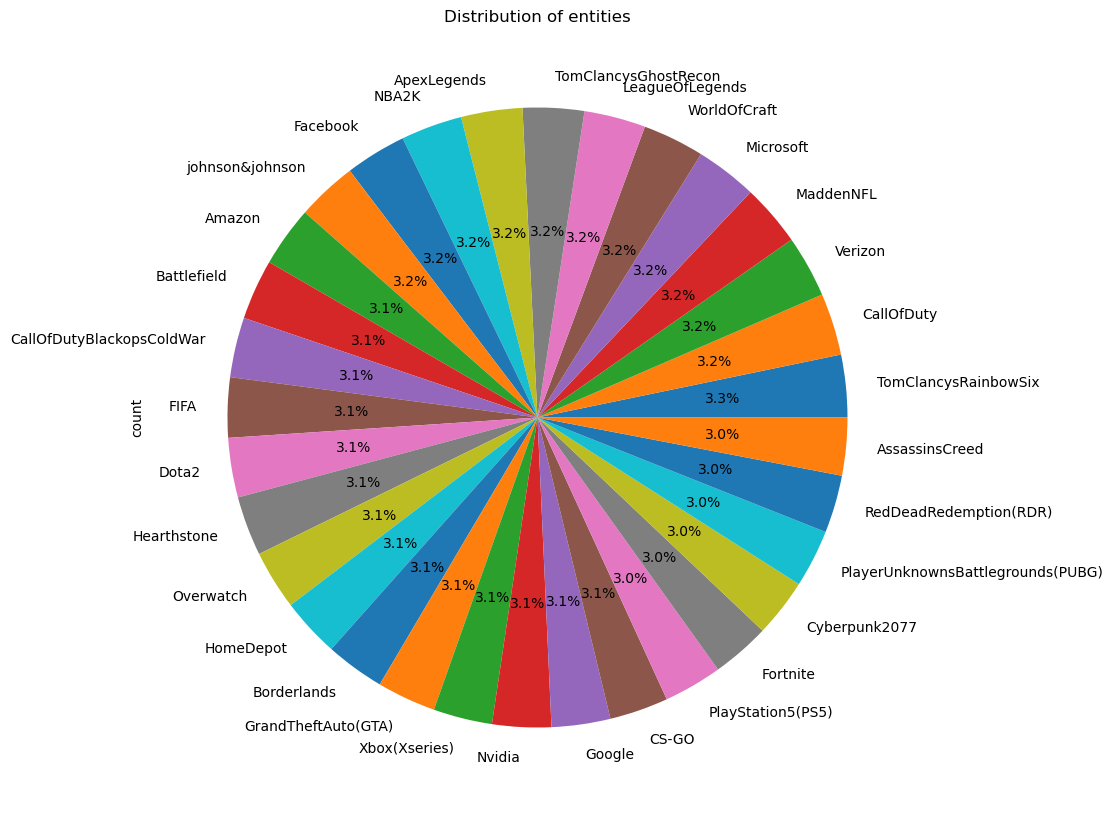

In [37]:
entity_content=twitts['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

- we can see from the above plot the entities of the tweets are mostly equals

<Axes: xlabel='sentiment'>

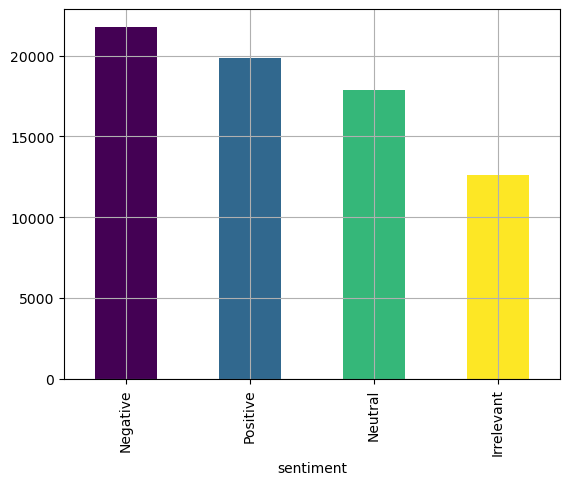

In [38]:
sentiment_content=twitts['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

- at the above figure we can see the number of the negative reactions are above to 20000
- the min number of the reactions are the number of the irrelevant reactions are less tan 15000

<Axes: xlabel='entity'>

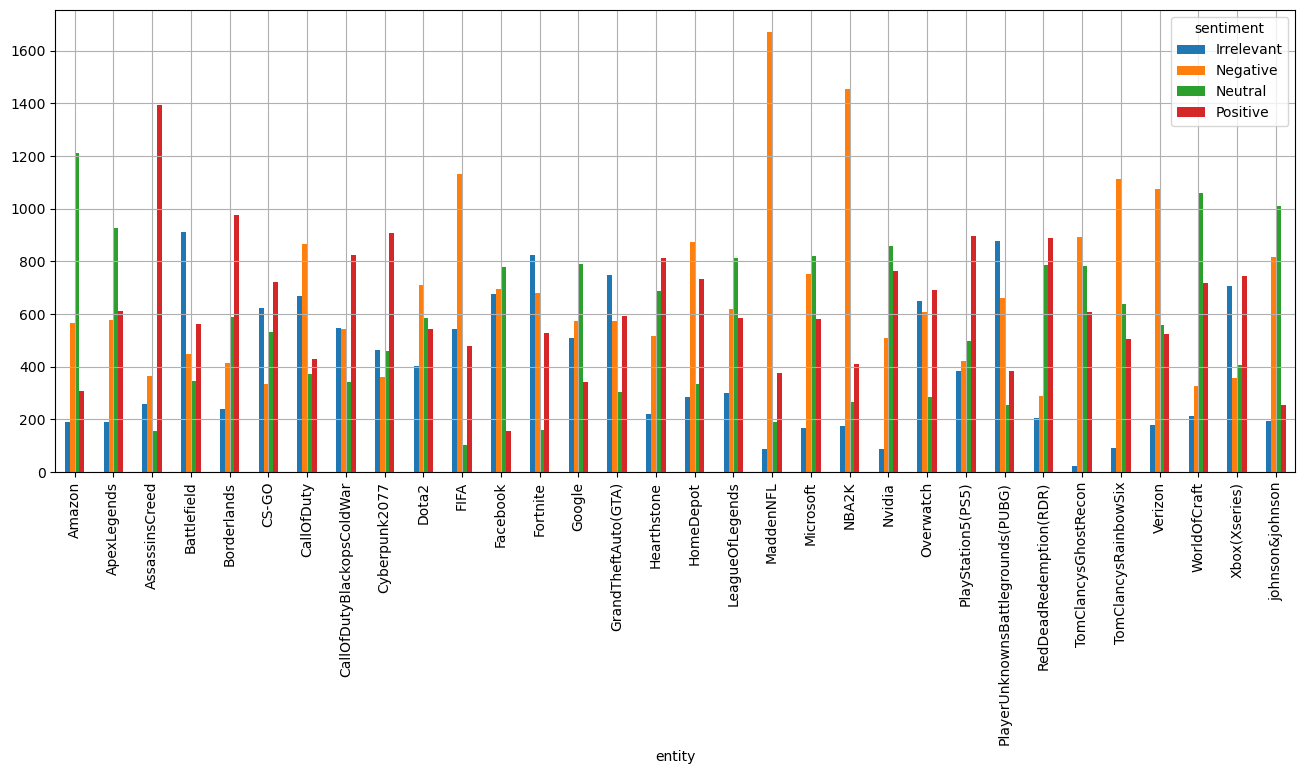

In [39]:
reactions_entities = pd.crosstab(twitts['entity'],twitts['sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

- From the above figure the highest negative reactions in the MaddenNFL entity
- The highest  irrelevant reactions in the Battlefield entity 
- The highest  neutral reactions in the Amazon entity 
- The highest  positive reactions in the AssassinsCreed entity 